# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom Data.csv to Telecom Data.csv


## Reading data and initial processing

In [ ]:
#edit the file location of raw data set
cust_df=pd.read_csv("Telecom Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
cust_df.shape

(51047, 58)

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
cust_df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


## Exercise

## Placeholder for your analysis

In [ ]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 57)

In [ ]:
# Checking for duplicate values
print(cust_df.CustomerID.nunique()/cust_df.shape[0]) # if the answer is 1 then there are no duplicate values

1.0


In [ ]:
# Checking whether the data id balanced or imbalanced 
# For example:  If you have 90% people who are not diabetic and 10% are diabetic. 
# Then if you have a useless model, which simply predicts as 'Not diabetic' always, it gives a high accuracy of 90%
# So it is difficult to evaluate , as certain models like Decision Tree, and Logistic Regression have a bias towards the majority class.
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [ ]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
print(cust_df[cust_df.MonthlyRevenue == 0].shape[0])
for i in range(cust_df.shape[0]):
  if cust_df.loc[i]['MonthlyRevenue'] == 0:
    cust_df.drop(i,inplace=True)
print(cust_df[cust_df.MonthlyRevenue == 0].shape[0])
cust_df = cust_df.reset_index()


6
0


In [ ]:
# the unnecesary columns can be removed
cust_df.drop(['level_0', 'index', 'CustomerID'],axis=1,inplace=True)

### Q1.2 How many columns has missing values percentage > 5%

In [ ]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

percentage_of_null = (cust_df.isnull().sum()/cust_df.shape[0])*100
percentage_of_null

Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea                  0.047021
Handsets    

In [ ]:
num=0
for i in percentage_of_null:
  if i> 0.05:
    num+=1
print('The number of columns with missing value percentage greater than 5% is',num)

The number of columns with missing value percentage greater than 5% is 10


In [ ]:
a = []
for i in list(cust_df.columns):
  if cust_df[i].isnull().any() == True:
    a.append(i) # So,a has the names of the columns, which contain null values

<Figure size 720x720 with 0 Axes>

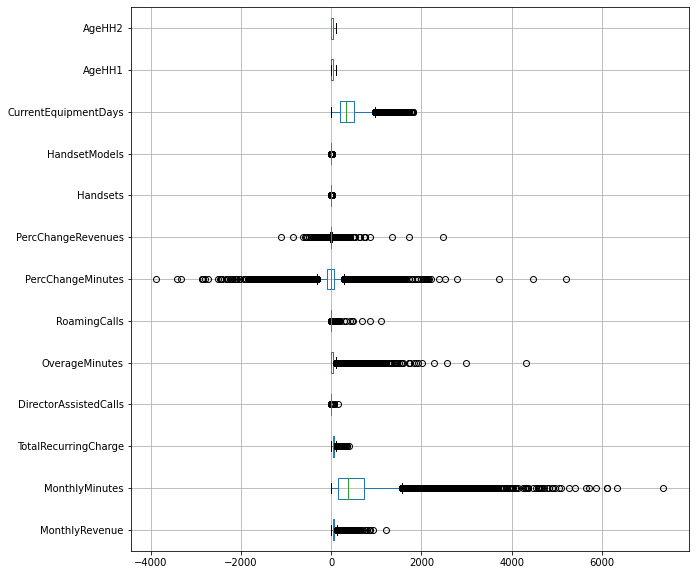

In [ ]:
cols= a.remove('ServiceArea') # because ServiceArea is a categorical column
plt.figure(figsize = (10,10))
cust_df[a].boxplot(column=cols, vert =False) # boxplot helps to visualize the outliers

In [ ]:
df = cust_df[a]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
k = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
k

MonthlyRevenue            2997
MonthlyMinutes            2567
TotalRecurringCharge       824
DirectorAssistedCalls     5530
OverageMinutes            5842
RoamingCalls              8835
PercChangeMinutes         6807
PercChangeRevenues       13221
Handsets                  4414
HandsetModels             2008
CurrentEquipmentDays      1445
AgeHH1                       0
AgeHH2                       0
dtype: int64

In [ ]:
# Null value containing rows
# with high number of ouliers : ['MonthlyRevenue','MonthlyMinutes','DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','Handsets','HandsetModels','PercChangeRevenues']  
# with low number of outliers : ['TotalRecurringCharge','CurrentEquipmentDays','AgeHH1','AgeHH2']
# The number of outliers in a column is important to decide the manner in which we want to impute its null values.
# High number of outliers : Impute with the median of the column
# Low number of outliers : Impute with the mean of the column

In [ ]:
a = cust_df.columns[cust_df.isna().any() ]
for i in a:
  print(i,cust_df[i].dtypes)

MonthlyRevenue float64
MonthlyMinutes float64
TotalRecurringCharge float64
DirectorAssistedCalls float64
OverageMinutes float64
RoamingCalls float64
PercChangeMinutes float64
PercChangeRevenues float64
ServiceArea object
Handsets float64
HandsetModels float64
CurrentEquipmentDays float64
AgeHH1 float64
AgeHH2 float64


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

In [ ]:
# other than that all the null value containing columns are float64
# those columns with high number of outliers is replaces null values with median
#h = ['MonthlyRevenue','MonthlyMinutes','DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','Handsets','HandsetModels','PercChangeRevenues'] 
#for i in h:
#  cust_df[i].fillna((cust_df[i].median),inplace=True)

In [ ]:
# those columns with low number of outliers is replaces null values with mean
#l = ['TotalRecurringCharge', 'CurrentEquipmentDays', 'AgeHH1','AgeHH2']
#for i in l:
#  cust_df[i].fillna((cust_df[i].mean),inplace = True)

In [ ]:
# columns with string values, replaces null values with mode
#cust_df['ServiceArea'].fillna((cust_df['ServiceArea'].mode),inplace = True)
#cust_df.isna().sum().sum()

0

If it is a numerical column then, check for the number of outliers. If there are high number of outliers, use median to impute the missing values, or else use the mean.
For categorical columns use the mode to impute the missing values.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

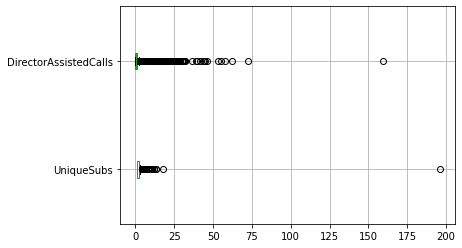

In [ ]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=['UniqueSubs','DirectorAssistedCalls']
cust_df[cols].boxplot(vert=False)

In [ ]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
cust_df.reset_index()
us_99 = cust_df.UniqueSubs.quantile(0.99)
dac_99 = cust_df.DirectorAssistedCalls.quantile(0.99)

for i in range(cust_df.shape[0]):
  if ((cust_df.UniqueSubs[i] > us_99) | (cust_df.DirectorAssistedCalls[i] > dac_99)):
    cust_df.drop(i,inplace=True)
print( us_99,dac_99,cust_df.UniqueSubs.quantile(0.99),cust_df.DirectorAssistedCalls.quantile(0.99))


,index,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,51036,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51037,51037,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51038,51038,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51039,51039,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


5.0 9.65 4.0 6.93


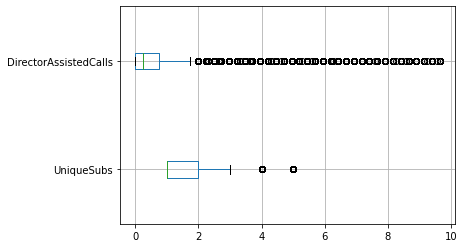

In [ ]:
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols, vert=False)

In [ ]:
# we can see a decrease in the number of outliers.

## Q2. Perform exploratory analysis to analyze customer churn

In [ ]:
# we can also drop the rows with null values
cust_df.dropna(axis=0,inplace=True)

### Q2.1 Does customers with high overage minutes also have high revenue?

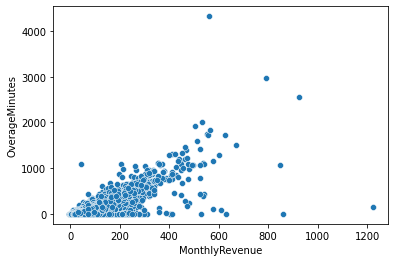

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df )

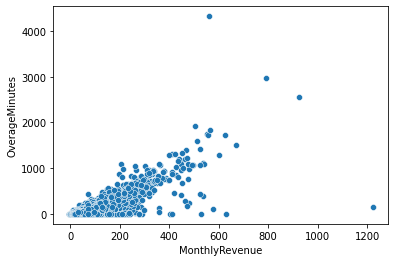

In [ ]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn == 'No'] ) # those who have not churned

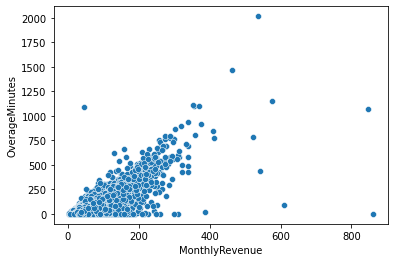

In [ ]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn == "Yes"] ) # those who have churned

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

We can observe a positive linear corelation between the Overage Minutes and the Monthly Revenue (in Churned and non-churned customers). So, in general, we can say that customers with high overage minutes have high monthly revenue.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

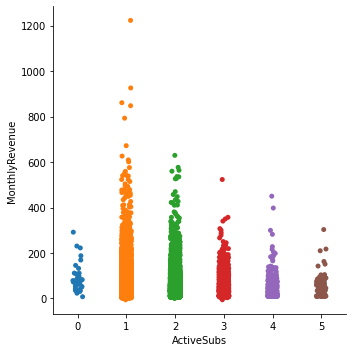

In [ ]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs',y='MonthlyRevenue',data= cust_df) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

Yes, we can observe a decrease in the monthly revenue as the active subscribers are increasing. This can be seen in the above category plot, that as active subs are increasing, high Monthly Revenues is becoming rarer.

### Q2.3 Does credit rating have an impact in churn rate?

In [ ]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=0) # Percent of customers of a particulat CreditRating, choosing to churn or not
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=1) # Percent of Churned customers, who belong to a CreditRating (and also for non-Churned customers)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.693462,0.700059,0.692327,0.74253,0.782293,0.735915,0.712949
Yes,0.306538,0.299941,0.307673,0.25747,0.217707,0.264085,0.287051


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.162345,0.370581,0.160003,0.109287,0.138529,0.017905,0.041350
Yes,0.178887,0.395786,0.177249,0.094462,0.096099,0.016017,0.041501


In [ ]:
pd.crosstab(cust_df.Churn,cust_df.CreditRating) # it describes the number of people in different credit ratings, who choose to churn or not to churn

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,5892,13280,5802,3958,5062,836,1502
Yes,2628,5712,2608,1398,1435,316,612


<mark>__Result:__
    
Type your interpretation here based on the analysis above

We can observe almost an 30 % churning probability in all of the CreditRating Customers.(from table 1)
Hence, Credit Rating does NOT have much impact on the Churn Rate.
But, most of the customers who have churned belong to 2-High Credit Rating (from table2, table3), followed by 1-Highest and then by 3-Good. This is because most of the customers belong to these three CreditRating classes (1-Highest,2-High,3-Good)

### Placeholder for additional exploratory analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66b2987a90>,
      dtype=object)

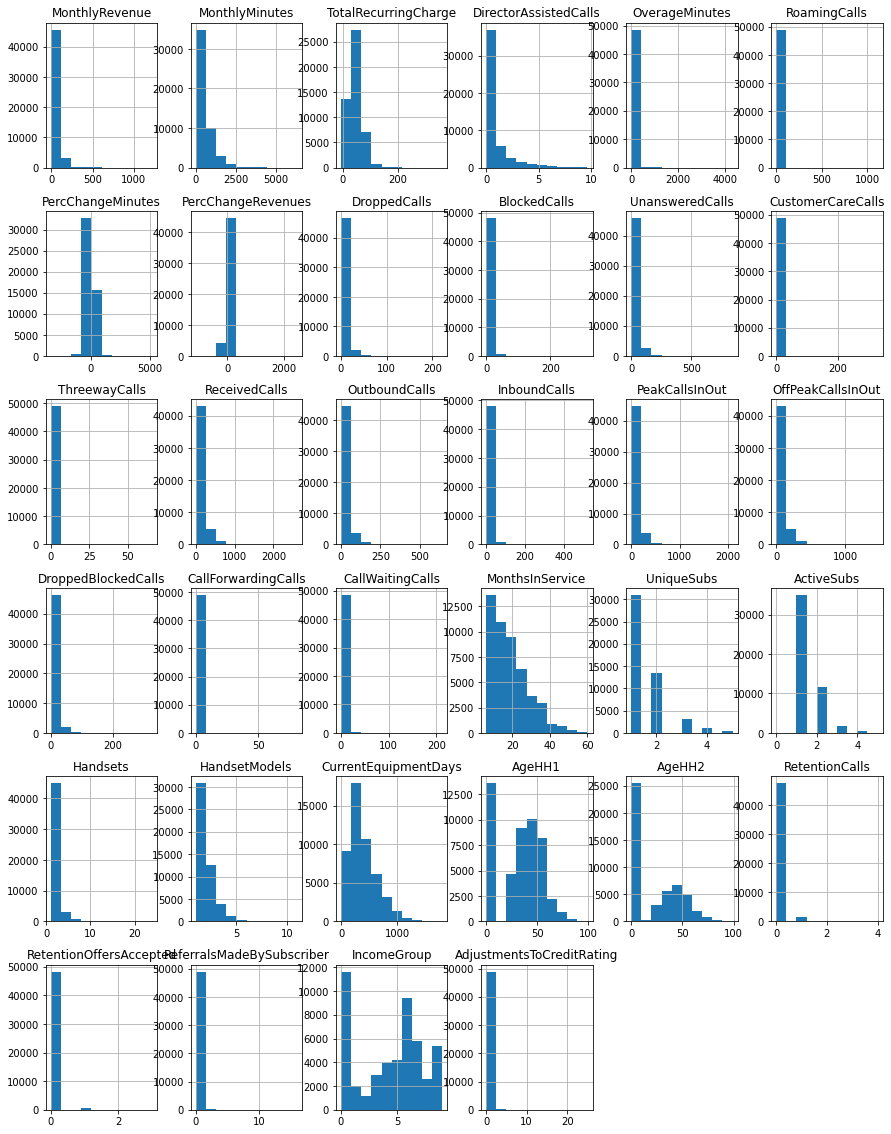

In [ ]:
#type your code here for any additional exploratory analysis (if any)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cust_df[1:].hist(ax=ax)

In [ ]:
cust_df.select_dtypes(float).columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')

In [ ]:
cust_df.select_dtypes(int).columns

Index(['MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [ ]:
cust_df.select_dtypes(object).columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

## Q3. Create additional features to help predict churn

In [ ]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=  cust_df['TotalRecurringCharge'] / cust_df.MonthlyRevenue
    
    return cust_df  


In [ ]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

In [ ]:
cust_df.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [ ]:
cust_df.ServiceArea.nunique()

741

In [ ]:
for i in list(cust_df.select_dtypes(object).columns):
  print(i,cust_df[i].nunique())

Churn 2
ServiceArea 741
ChildrenInHH 2
HandsetRefurbished 2
HandsetWebCapable 2
TruckOwner 2
RVOwner 2
Homeownership 2
BuysViaMailOrder 2
RespondsToMailOffers 2
OptOutMailings 2
NonUSTravel 2
OwnsComputer 2
HasCreditCard 2
NewCellphoneUser 2
NotNewCellphoneUser 2
OwnsMotorcycle 2
HandsetPrice 16
MadeCallToRetentionTeam 2
CreditRating 7
PrizmCode 4
Occupation 8
MaritalStatus 3


In [ ]:
#Create dummy variables for all categorical variables
cust_df.select_dtypes(object).columns # categorical columns
X = pd.get_dummies(cust_df.drop(['ServiceArea'],axis=1)) # we are not including the column: Service Area, as it has high number of (741) unique names

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [ ]:
print(X.shape)
X.drop(['Churn_No','ChildrenInHH_No','HandsetRefurbished_No','HandsetWebCapable_No','TruckOwner_No','RVOwner_No','Homeownership_Unknown','BuysViaMailOrder_No', 'RespondsToMailOffers_No', 'OptOutMailings_No',
       'NonUSTravel_No', 'OwnsComputer_No', 'HasCreditCard_No', 'NewCellphoneUser_No','NotNewCellphoneUser_No', 'OwnsMotorcycle_No','MadeCallToRetentionTeam_No','MaritalStatus_No'],axis=1,inplace = True)
X.shape

(49066, 108)


(49066, 90)

In [ ]:
# Undersampling, Oversampling, SMOTE is used in the case of imbalanced data
# check version number
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

0.8.1


In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
x = X.drop(['Churn_Yes'],axis=1)
y = X['Churn_Yes']

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') # this would make the minority class of the same length as the majority class
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x, y)

# summarize class distribution
print(Counter(y_over))

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train  = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Counter({0: 35018, 1: 14048})
Counter({1: 35018, 0: 35018})


In [ ]:
# SMOTE Technique 
# we can also use SMOTE Technique to oversample and get a balanced data
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression 
lr= LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model

y_pred = lr.predict(X_test)
df_pred = pd.DataFrame(lr.predict_proba(X_test))
df_pred['Final_Pred'] = y_pred

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
df_pred['Pred_70%']=np.where(lr.predict_proba(X_test)[:,1]>0.7,1,0) # if probability is greater than 0.7 then it is assigned 1 or else 0


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix : \n", cm)
print('Accuracy', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix : 
 [[6125 4304]
 [4480 6102]]
Accuracy 0.5819332730474513
              precision    recall  f1-score   support

           0       0.58      0.59      0.58     10429
           1       0.59      0.58      0.58     10582

    accuracy                           0.58     21011
   macro avg       0.58      0.58      0.58     21011
weighted avg       0.58      0.58      0.58     21011



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn,fp,fn,tp)

(6125, 4304, 4480, 6102)

In [ ]:
print('Precsion from Logistic Regression is:', (tp)/(tp+fp))
print('Recall from Logistic Regression is:', (tp)/(tp+fn))
print('Accuracy from Logistic Regression is:',(tp+tn)/(tp+tn+fp+fn))

Precsion from Logistic Regression is: 0.5863924658850663
Recall from Logistic Regression is: 0.5766395766395767
Accuracy from Logistic Regression is: 0.5819332730474513


In [ ]:
df_pred.head()

,0,1,Final_Pred,Pred_70%
0,0.511193,0.488807,0,0
1,0.682779,0.317221,0,0
2,0.321912,0.678088,1,0
3,0.593960,0.406040,0,0
4,0.505875,0.494125,0,0


In [ ]:
df_pred[df_pred[1]>0.69].head() # in this we can see the difference in the last two columns, with a threshold of 0.5 and 0.7

,0,1,Final_Pred,Pred_70%
59,0.240896,0.759104,1,1
161,0.281877,0.718123,1,1
173,0.295769,0.704231,1,1
191,0.306681,0.693319,1,0
201,0.264479,0.735521,1,1


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_pred1 = rf.predict(X_test)
df_pred1 = pd.DataFrame(rf.predict_proba(X_test))
df_pred1['Final_Pred'] = y_pred1

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
df_pred1['Pred_70%']=np.where(rf.predict_proba(X_test)[:,1]>0.7,1,0) # if probability is greater than 0.7 then it is assigned 1 or else 0


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred1)

print("Confusion Matrix : \n", cm)
print('Accuracy', accuracy_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))


Confusion Matrix : 
 [[9163 1266]
 [1696 8886]]
Accuracy 0.8590262243586693
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10429
           1       0.88      0.84      0.86     10582

    accuracy                           0.86     21011
   macro avg       0.86      0.86      0.86     21011
weighted avg       0.86      0.86      0.86     21011



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred1).ravel()
print('Precision from Random Forest Classifier is:', (tp)/(tp+fp))
print('Recall from Random Forest Classifier is:', (tp)/(tp+fn))
print('Accuracy from Random Forest Classifier is:',(tp+tn)/(tp+tn+fp+fn))

Precision from Random Forest Classifier is: 0.8752955082742316
Recall from Random Forest Classifier is: 0.8397278397278397
Accuracy from Random Forest Classifier is: 0.8590262243586693


Precsion from Logistic Regression is: 0.5863924658850663

Recall from Logistic Regression is: 0.5766395766395767

Accuracy from Logistic Regression is: 0.5819332730474513

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

Random Forest Classifier has better Precision, Recall, and Accuracy.

### Q4.3 Identify most important features impacting churn

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

a = pd.Series(rf.feature_importances_, index=pd.DataFrame(X_train).columns)
a

0     0.040525
1     0.046273
2     0.027946
3     0.019406
4     0.024221
        ...   
85    0.001089
86    0.001140
87    0.000739
88    0.005272
89    0.004769
Length: 90, dtype: float64

In [ ]:
b = pd.DataFrame(a)
b.rename(columns = {0:'Col1'},inplace=True)
b.head()

,Col1
0,0.040525
1,0.046273
2,0.027946
3,0.019406
4,0.024221


In [ ]:
b.sort_values(by='Col1',ascending=False).head()

,Col1
26,0.054436
6,0.046299
1,0.046273
35,0.043613
0,0.040525


In [ ]:
# b came from X_train, X_train came from X
x.iloc[:2,[26,6,1,35,0]].columns

Index(['CurrentEquipmentDays', 'PercChangeMinutes', 'MonthlyMinutes',
       'perc_recurrent_charge', 'MonthlyRevenue'],
      dtype='object')

In [ ]:
# The top 5 prominent columns are : CurrentEquipmentDays, PercChangeMinutes, MonthlyMinutes, perc_recurrent_change, MonthlyRevenue

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom - Prediction Data.csv to Telecom - Prediction Data.csv


In [ ]:
df = pd.read_csv('Telecom - Prediction Data.csv')
df.select_dtypes(object).columns
df.drop(['Churn','CustomerID'],axis=1,inplace=True)
df.shape

Index(['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

(20000, 56)

In [ ]:
print(df.shape,cust_df.shape)

(20000, 56) (49066, 59)


In [ ]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4


#Use "predict" function on the transformend data using the best fitted model object
df = create_features(df)
df.dropna(axis=0,inplace=True)
print(df.shape)
print(X.columns)
X = pd.get_dummies(df.drop(['ServiceArea'],axis=1)) # Since ServiceArea has 741 unique names, it would lead to 741 new columns. So we ignore it
print(X.shape)

(19528, 58)
Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'perc_active_subs', 'perc_recurrent_charge', 'Churn_Yes',
       'ChildrenInHH_Yes', 'HandsetRefurbished_Yes', 'HandsetWebCapable_Yes',
       'TruckOwner_Yes', 'RVOwner_Yes', 'Homeownership_Known',
       'BuysViaMailOrder_Yes', 'RespondsToMailOffers_Yes',
       'O

In [ ]:
print(X.shape)
X.drop(['ChildrenInHH_No','HandsetRefurbished_No','HandsetWebCapable_No','TruckOwner_No','RVOwner_No','Homeownership_Unknown','BuysViaMailOrder_No', 'RespondsToMailOffers_No', 'OptOutMailings_No',
       'NonUSTravel_No', 'OwnsComputer_No', 'HasCreditCard_No', 'NewCellphoneUser_No','NotNewCellphoneUser_No', 'OwnsMotorcycle_No','MadeCallToRetentionTeam_No','MaritalStatus_No'],axis=1,inplace = True)
X.shape

(19528, 106)


(19528, 89)

In [ ]:
#Feature scaling for all continuous variable
sc = StandardScaler() 
X  = sc.fit_transform(X)

In [ ]:
y_pred1 = rf.predict(X)
df_pred1 = pd.DataFrame(rf.predict_proba(X))
df_pred1['Final_Pred'] = y_pred1

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
df_pred1['Pred_70%']=np.where(rf.predict_proba(X)[:,1]>0.7,1,0) # if probability is greater than 0.7 then it is assigned 1 or else 0


In [ ]:
df_pred1.head()

,0,1,Final_Pred,Pred_70%
0,0.76,0.24,0,0
1,0.68,0.32,0,0
2,0.72,0.28,0,0
3,0.68,0.32,0,0
4,0.76,0.24,0,0


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   